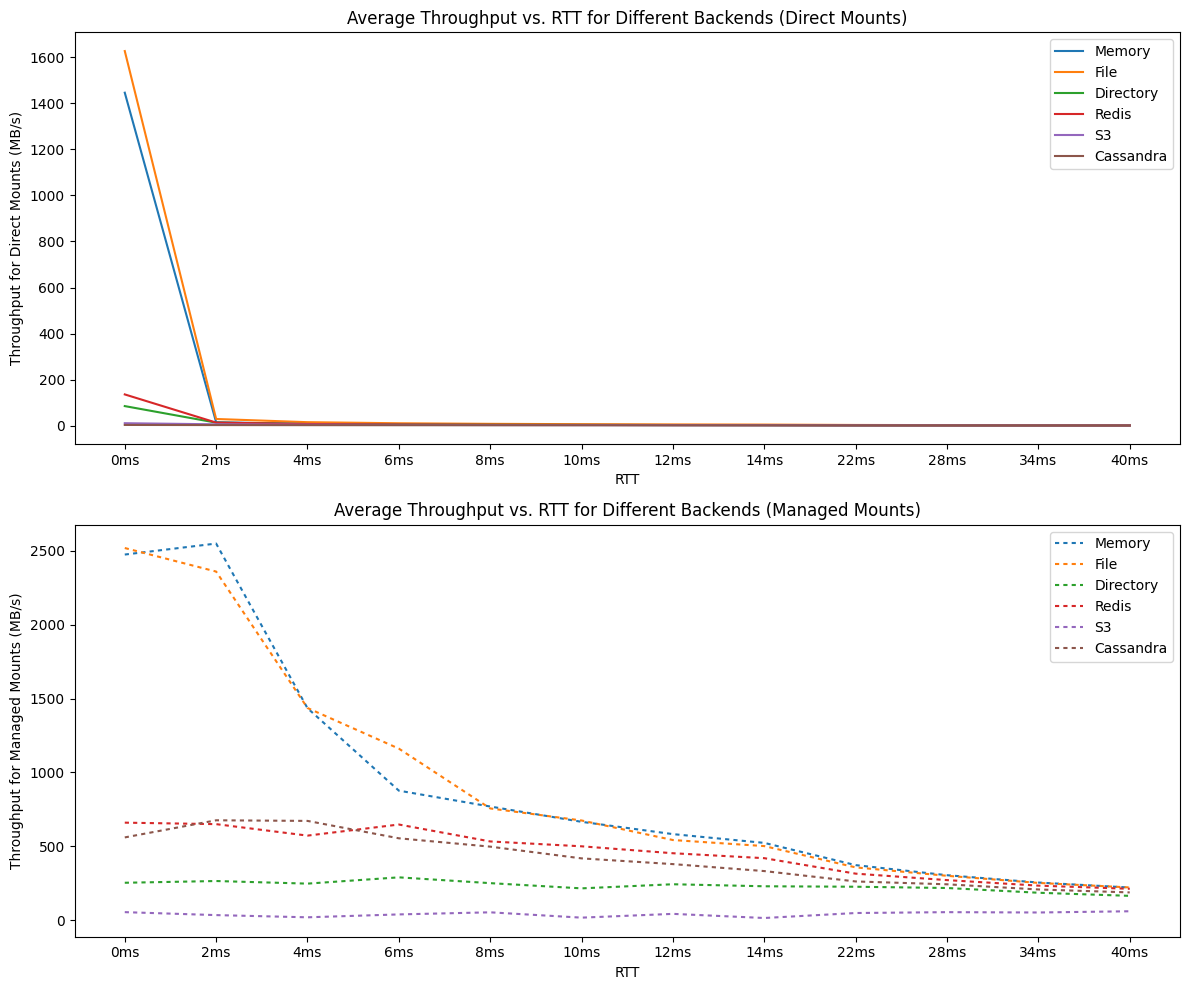

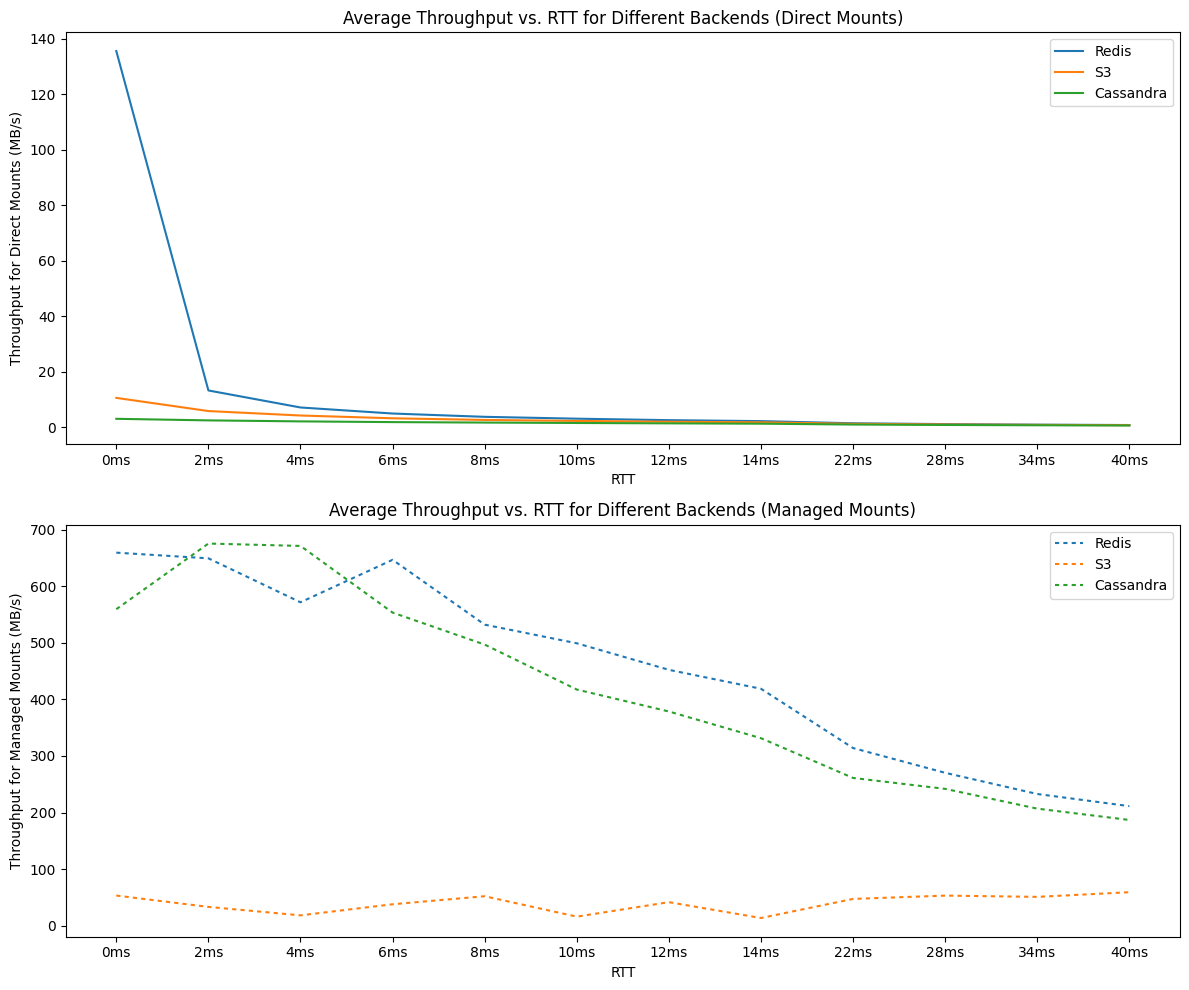

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('../bench/throughput-allvar/results.csv')

# Fill the missing values
df['RTT'] = df['RTT'].ffill()
df['Service'] = df['Service'].ffill()

# Plot the graphs with all services

fig, axs = plt.subplots(2, 1, figsize=(12, 10))

# For Direct Mounts
sns.lineplot(data=df, x='RTT', y='Throughput for Direct Mounts (MB/s)', hue='Service', palette='tab10', ax=axs[0], errorbar=None)
axs[0].set_title('Average Throughput vs. RTT for Different Backends (Direct Mounts)')
axs[0].legend(labels=[service.title() for service in df['Service'].unique()])

# For Managed Mounts
sns.lineplot(data=df, x='RTT', y='Throughput for Managed Mounts (MB/s)', hue='Service', palette='tab10', ax=axs[1], errorbar=None, style='Service', dashes=[(2,2) for _ in df['Service'].unique()])
axs[1].set_title('Average Throughput vs. RTT for Different Backends (Managed Mounts)')
axs[1].legend(labels=[service.title() for service in df['Service'].unique()])

plt.tight_layout()
plt.show()

# Exclude 'file', 'memory', and 'directory' from the data
df_excluded = df[~df['Service'].isin(['file', 'memory', 'directory'])]

# Plot the graphs with excluded services

fig, axs = plt.subplots(2, 1, figsize=(12, 10))

# For Direct Mounts
sns.lineplot(data=df_excluded, x='RTT', y='Throughput for Direct Mounts (MB/s)', hue='Service', palette='tab10', ax=axs[0], errorbar=None)
axs[0].set_title('Average Throughput vs. RTT for Different Backends (Direct Mounts)')
axs[0].legend( labels=[service.title() for service in df_excluded['Service'].unique()])

# For Managed Mounts
sns.lineplot(data=df_excluded, x='RTT', y='Throughput for Managed Mounts (MB/s)', hue='Service', palette='tab10', ax=axs[1], errorbar=None, style='Service', dashes=[(2,2) for _ in df_excluded['Service'].unique()])
axs[1].set_title('Average Throughput vs. RTT for Different Backends (Managed Mounts)')
axs[1].legend( labels=[service.title() for service in df_excluded['Service'].unique()])

plt.tight_layout()
plt.show()
